In [19]:
import matplotlib
import pandas as pd
matplotlib.rcParams['figure.figsize'] = [15.0, 10.0]
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn import preprocessing
import pprint as pp 

In [147]:
data_all = pd.read_csv("data_test.csv")

In [150]:
data_all

,Player,salary,Age,G,GS,MP,PER,TS%,OWS,DWS,...,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,Quincy Acy,1914544,24,68,22,1287,11.9,0.533,1.0,0.7,...,76,97,79,222,68,27,22,60,147,398
1,Steven Adams,2279040,21,70,67,1771,14.1,0.549,1.9,2.2,...,103,205,199,324,66,38,86,99,222,537
2,Arron Afflalo,12500000,29,78,72,2502,10.7,0.533,1.6,1.0,...,167,198,27,220,129,41,7,116,167,1035
3,Arron Afflalo,12500000,29,53,53,1750,11.7,0.533,1.4,0.4,...,127,151,21,159,101,32,5,83,108,771
4,Arron Afflalo,12500000,29,25,19,752,8.2,0.533,0.2,0.5,...,40,47,6,61,28,9,2,33,59,264
5,Alexis Ajinca,4300000,26,68,8,957,19.9,0.595,1.9,1.2,...,81,99,104,211,47,21,51,69,151,443
6,Cole Aldrich,1100600,26,61,16,976,18.1,0.513,0.8,1.4,...,50,64,101,237,75,37,65,59,122,338
7,LaMarcus Aldridge,19500000,29,71,71,2512,22.8,0.528,4.9,3.7,...,306,362,177,549,124,48,68,122,125,1661
8,Lavoy Allen,948163,25,63,0,1070,14.9,0.493,1.3,1.6,...,33,47,123,200,73,15,42,40,102,315
9,Tony Allen,5168539,33,63,41,1648,14.6,0.528,0.9,3.2,...,79,126,103,177,86,129,30,86,166,539


In [151]:
X_all = data_all.iloc[:,2:]

In [152]:
X_all.values

array([[  24.,   68.,   22., ...,   60.,  147.,  398.],
       [  21.,   70.,   67., ...,   99.,  222.,  537.],
       [  29.,   78.,   72., ...,  116.,  167., 1035.],
       ...,
       [  20.,   19.,    0., ...,    3.,   17.,   23.],
       [  22.,   44.,   18., ...,   40.,   78.,  240.],
       [  19.,   38.,   11., ...,   30.,   66.,  284.]])

In [145]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,10))
X_minmax = min_max_scaler.fit_transform(X_all)
X_minmax

array([[ 5.        , 10.        ,  1.70731707, ...,  3.125     ,
         3.60465116,  3.03752932],
       [ 5.        ,  6.54320988,  1.58536585, ...,  2.37068966,
         2.36434109,  2.24394058],
       [ 5.        ,  3.33333333,  0.12195122, ...,  0.75431034,
         1.24031008,  0.79358874],
       ...,
       [ 8.125     ,  2.83950617,  0.48780488, ...,  0.86206897,
         1.62790698,  0.69976544],
       [ 3.125     ,  3.20987654,  0.        , ...,  0.5387931 ,
         1.20155039,  0.58639562],
       [ 3.125     ,  3.95061728,  0.        , ...,  0.10775862,
         0.19379845,  0.26583268]])

In [144]:
pp.pprint(X_minmax.std(axis=0))

array([2.34348852, 3.02037207, 3.4063029 , 2.84236551, 1.06678966,
       0.77687701, 1.50959006, 2.11375647, 1.16483121, 1.31571939,
       1.32446145, 2.14297264, 2.01279631, 1.42748098, 1.65405396,
       2.1420365 , 2.02445008, 0.76612005, 1.60521606, 1.6004607 ,
       1.61730797, 1.40609604, 2.09437824, 2.29827975, 1.06882007,
       1.68441889, 2.33064493, 1.99710796])


In [153]:
Y_salary = data_all['salary']

In [26]:
Y_salary

0       3000000
1       3000000
2       3000000
3       4000000
4       3000000
5       6500000
6      13086957
7       2000000
8       2658240
9       7708427
10       997547
11       997547
12       997547
13      2399040
14      2399040
15      2399040
16       845059
17      2038206
18      2038206
19      2038206
20      5013559
21      9588426
22       947276
23     11370786
24       845059
25     14780000
26     14780000
27      1662360
28      1662360
29      1662360
         ...   
273     8000000
274     3000000
275      290951
276     1988520
277    14275000
278     5562360
279    15500000
280      390706
281     6000000
282     7000000
283     1312611
284    19000000
285     6261395
286       25000
287     1312611
288     1312611
289     4347826
290    12000000
291    18063850
292      333334
293       50000
294       50000
295       50000
296    28530608
297     1312611
298     5474787
299     5474787
300     5474787
301     1645200
302     1471382
Name: salary, Length: 30

In [154]:
scaler_x = preprocessing.StandardScaler().fit(X_all)
scaler_y = preprocessing.StandardScaler().fit(Y_salary[:,np.newaxis])
X_data = scaler_x.transform(X_all) 
Y_data = scaler_y.transform(Y_salary[:,np.newaxis]) 
#After data scaling
#scaler.inverse_transform(scaler.transform(X_train))→ can get the original data
# Q: 预测时，如何将新数据变化进来和变化出去？

C:\Users\40528\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
X_data

array([[ 0.17603724,  1.28343848, -0.39724457, ...,  0.65603725,
         0.02804674,  0.41254431],
       [ 0.17603724,  0.13894699, -0.4330462 , ...,  0.20822089,
        -0.50412787,  0.01517534],
       [ 0.17603724, -0.92379511, -0.86266584, ..., -0.75138561,
        -0.98641112, -0.71105072],
       ...,
       [ 1.50951935, -1.08729389, -0.75526093, ..., -0.68741185,
        -0.82010655, -0.7580303 ],
       [-0.62405202, -0.96466981, -0.89846748, ..., -0.87933315,
        -1.00304158, -0.8147973 ],
       [-0.62405202, -0.71942163, -0.89846748, ..., -1.13522821,
        -1.43543346, -0.97531088]])

In [155]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
digits = X_data
digits.data.shape 

(1449, 28)

Text(0.5,0,'number of components')

Text(0,0.5,'cumulative explained variance')

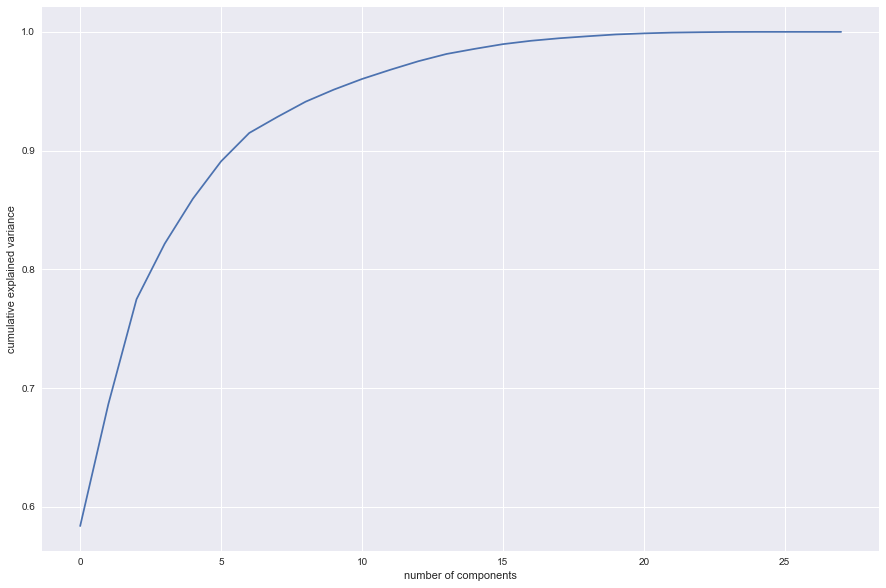

In [156]:
matplotlib.rcParams['figure.figsize'] = [15.0, 10.0]
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [157]:
pca = PCA(n_components=0.8)
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
print("original shape: ", X_data.shape)
print("transformed shape:", X_pca.shape)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

original shape:  (1449, 28)
transformed shape: (1449, 4)


In [158]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) 
model.fit(X_pca, Y_data) 
#xfit = np.linspace(0, 10, 1000)
# 4. Predict from the model
#yfit = model.predict(xfit[:, np.newaxis])

# Evaluate the model
print(model.intercept_)
print(model.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[1.40284137e-17]
[[0.16710407 0.0016874  0.02034386 0.1043213 ]]


In [159]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_pca, Y_data, cv=10)

array([0.26717312, 0.444252  , 0.16694628, 0.43250649, 0.57666801,
       0.35655438, 0.58503628, 0.53671508, 0.38864076, 0.388317  ])

In [160]:
r_score = model.score(X_pca, Y_data)

In [161]:
r_score

0.4717515386358069

In [173]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree = 2)

In [174]:
#对训练集进行拟合标准化处理
x_pol = pol.fit_transform(X_pca)
#模型初始化
lr_pol = LinearRegression()
#拟合
lr_pol.fit(x_pol, Y_data)
print(lr_pol.intercept_)
print(lr_pol.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[-0.00711288]
[[ 0.          0.18056203  0.01574658  0.10695203  0.07897957  0.00473404
   0.01291083  0.02119786 -0.01272591 -0.01822402 -0.00415711 -0.0142987
  -0.00939853 -0.0024077   0.00409513]]


In [175]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr_pol,pol.transform(X_pca), Y_data, cv=10)

array([0.28640734, 0.45524779, 0.21478208, 0.35921295, 0.60524515,
       0.42519064, 0.56870083, 0.57952283, 0.42057222, 0.39109464])

In [172]:
r_score = lr_pol.score(pol.transform(X_pca), Y_data)
r_score

0.5285872715814335